# A mini-intro to Deep Learning (focused on Computer Vision)

Credits: 
  - [David Yanofski](https://qz.com/author/davidyanofskyquartz/) for the ImageNet History image
  - [Alex Bronstein and Avi Mendelson](https://vistalab-technion.github.io/cs236605/info/) for the blackboard-styled images on CNNs
  - [Simone Scardapane](http://ispac.diet.uniroma1.it/scardapane/teaching/tensorflow-for-ict-applications/) for the Inception v3 and ResNet images
  - [fast.ai](https://github.com/fastai/imagenette) for the Imagenette dataset

### AI (actually, Deep Learning) is around us

![AI_around_us](images/AI_around_us.png)

### Video synthesis

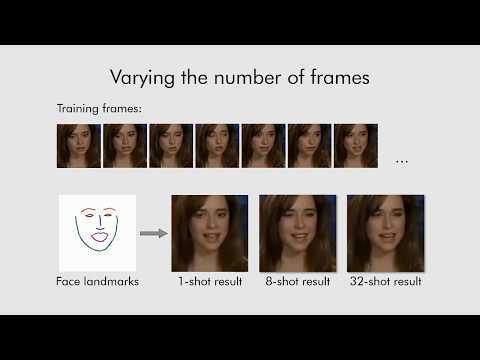

In [1]:
from IPython.display import YouTubeVideo
# display few-shots adversarial learning for talking heads
youtube_video = YouTubeVideo('p1b5aiTrGzY')
display(youtube_video)


#### PS: I'm always looking for more impressive Deep Learning videos, thus if you know of something more amazing, do let me know!

### BIG Data

![BIG_data](images/big_data.png)

### AI in Oil & Gas

![ai_oil_gas](images/ai_oil_gas.png)

### Recap: what is AI?

-  At least 8 different definitions, according to the reference textbook
- We define AI as the study of computer agents that interact with their environment, adapt to change, pursue goals and take actions to achieve the best expected outcome
- AI is not new: its conventional birth date is the Darmouth conference (1956)
- Big enthusiam in 1950-1970, but excessive optimism and failure to meet expectations led to AI winter in 1974 
- In the ‘80, success of expert systems (logic inference, symbolic AI) followed by another AI winter (today the biggest expert system, OpenCyc, doesn't have many applications, but less ambitious expert systems are used everyday)
- We skip through the rest of AI history
- The field of AI which is most successful today is **Machine Learning**, and in particular its subfield, **Deep Learning**

![hierarchy_ml](images/hierarchy_ml.png)  ![old_ml_def](images/old_ml_def.png) 

### An alternative definition of Machine Learning
- Machine Learning is informally defined as an algorithm which, given *data* and *labels* (for the simplest case of *supervised learning*) learns to associate data to labels, without being given an explicit association
- There is however an alternative definition which better highlights the concept that Machine Learning is basically *efficient searching in the space of algorithms* 
- An algorithm ( is a sequence of steps (the instructions) each of which is simple and well defined, and that stops after a finite number of steps. 
- In many real-world problems, it is much easier to identify **desirable behavior** of an algorithm than to explicitly define the steps. Example: identify the presence and the breed of a dog in a picture
- An algorithm is a **map** between input space and output space
- An algorithm is a **point** in the space of such maps 
- Search the space of algorithms (informally, computer programs) until desired behavior is obtained
- Surprisingly, it works!
- Learning from examples instead of explicit modelling

### ImageNet
- The event which led to contemporary success, global interest and hype about AI was the 2012 edition of the ILSVRC competition, also known as ImageNet competition
- Classify correctly 1.2 millions of images, 1000 classes
![dogs](images/dogs.png)

### The ImageNet moment
- In 2010 (ILSVRC first year), every competing team got at least 25% images wrong
- In 2012, using Deep Learning, team of AI legend Geoffrey Hinton reduced the error rate by nearly 50%
- This was a quantum leap, with respect to usual advance rate in AI
- Deep Learning has been used by ILSVRC winning teams since 2012, and it’s now being used in all the fields cited at the beginning of this notebook

![imagenet_history](images/imagenet_history.png)

### What is Deep Learning?

- Using huge ($O(10^6) ÷ O(10^9)$ of parameters) neural networks (NN) as the trainable model in Machine Learning
- Backpropagation-trained NN have been around since at least 1986, however the «old» NN were much smaller (~ 25 parameters)
- Only later, hardware (GPU), large amount of data and algoritmic innovations (SGD, dropout, BatchNorm, residual connections, Fixup initialization, etc.) made possible to train Deep neural networks
- **The huge amount of money being spent by FAANG on Deep Learning is making the field progress as never before (BigGAN, VQ-VAE, XLNet, GPT-2, RoBERTa, MEGATRON, etc.)**

### Convolutional Neural Networks

- Ok, how do we do classification on images in practice?
- An image of width $W$, height $H$ and with $C$ channels can be represented as a $W\times H\times C$ tensor
- Images are **BIG**: a small 256x256 RGB image is a tensor of $3\times256\times256\approx 2 \cdot 10^5$ components, the R, G and B intensities for each pixel. 
  - a classical MLP (fully connected, feed-forward neural network) with 512 neurons in the first hidden layer, would burn $(3\times256\times256+1)\times512\approx \cdot 10^8$ only in the **first hidden layer**, and we want to go deep (many layers!!)

![MLP](images/mlp3.png)

- Deep Learning is **HUNGRY**: $N=1.2\cdot10^6$ for ILSVRC! (but does this mean that we cannot use Deep Learning on small datasets? **NO** (transfer learning))
- It turns out we can solve the first problem, and simplify the second one, using the same ideas
- The right layer for image representation should be **translation-equivariant**: if I shift the image in any direction, its representation in feature space should just shift in the same way

$$\tau_p \mathcal{H}= \mathcal{H} \tau_p \ \forall p \in \mathbb{ℤ}^d$$

- This makes it easier to build classifiers which are **translation-invariant**
- Also, the representation should be sensitive to **local** features: the pixels identifying an eye in a face are all adjacent
- Q: how do we get **locality** and **translation-equivariance**? A: weight sharing, a.k.a **filters**

![weight_sharing](images/weight_sharing.png)

- obviously, weight sharing also reduces the number of parameters in our neural network, and it thus allows us to handle bigger datasets with the same computational power
- Weight sharing/filters leads to the concept of the **convolutional layer**

### Convolutional layer

![toeplitz](images/toeplitz.png)

 ![conv2](images/conv_layer_1.png) ![conv2](images/conv_layer_2.png)

- Convolutional layers are just one of the technical innovations which make modern CNNs so good at classifying images:
  - batch normalization/spectral normalization
  - max pooling
  - global pooling 
  - strided convolutions
  - atrous convolutions
  - the skip/residual connection, which enhances the NN **topological expressivity**
  - dropout (rapidly becoming obsolete)
  - new initializations, training schedules, label modifications, data augmentation tricks, etc.
- Listing them all would take way too much time
- Let's just mention two of the most famous/robust CNN architectures in use today

### Inception
- from Google 
- various version, we show v1 (2014) but v3 is the most commonly used today, as well as hybridizations with ResNet

![inception](images/inception.png)

### ResNet
- a family of architectures from Microsoft Research, which introduced the residual connection
- ResNet-50 (50 layers) is the most commonly used today, but ResNet-34 (picture) and ResNet-101 are also widely adopted

![resnet](images/resnet-34.png)

## Enough theory! Let's start coding

The three dominant Deep Learning frameworks/API today are [Tensorflow](https://www.tensorflow.org/), [Keras](https://keras.io/) and [PyTorch](https://pytorch.org/) (Tensorflow and Keras were recently unified with the release of Tensorflow 2.0)

![frameworks](images/deep_learning_frameworks.png)

We'll use **Keras** for our demonstration because it's a very high level API

### 1. Infererence
Let's start simple: we'll just download a ResNet50 model, pretrained on the subsets of ImageNet used for ILSVRC, and try to classify this image:

![elephant](images/elephant.jpg)

### Before we proceed, which class would you attribute to this image?

![question-mark](images/question-mark.png)

In [2]:
# Imports
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import requests
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import tarfile
from keras.callbacks import TensorBoard
from keras.callbacks.callbacks import ModelCheckpoint
from datetime import datetime
from keras.optimizers import Adam
import os
from urllib.parse import urlparse
# uncomment to set numpy random seed
# np.random.seed(42)

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-3b4e05c4ccc9>", line 2, in <module>
    from keras.applications.resnet50 import ResNet50
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/keras/__init__.py", line 3, in <module>
    from . import utils
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/keras/utils/__init__.py", line 6, in <module>
    from . import conv_utils
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/keras/utils/conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/keras/backend/__init__.py", line 1, in <module>
    from .load_backend import epsilon
  File "/anaconda3/envs/test_training/lib/python3.7/site-packages/keras/backend/load_backend.py", line 9

KeyboardInterrupt: 

In [ ]:
#prediction
model = ResNet50(weights='imagenet')

img_path = 'images/elephant.jpg'

# resize the image to the size commonly used with ResNet
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# preprocess the image (this corresponds to normalizing data in a classical Machine Learning model)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch), and return the three most probable classes
print('Predicted:', decode_predictions(preds, top=3)[0])

Did you guess "elephant" or "African elephant"? In the first case, the CNN was smarter than you 😉

### 2. Training
Now you will learn **why** you need a GPU to perform any serious Deep Learning. Let's try to train ResNet50 on a **smaller, simpler version of ImageNet**. **WARNING**: this is going to download a 1.56 Gb file on your pc, thus if you're not comfortable with that, skip this session.


##### Get Data

In [ ]:
# import dataset
http_proxy  = "http://pitc-zscaler-emea-florence.proxy.corporate.ge.com:80"
https_proxy = "http://pitc-zscaler-emea-florence.proxy.corporate.ge.com:80"
ftp_proxy   = "http://pitc-zscaler-emea-florence.proxy.corporate.ge.com:80"

proxyDict = { 
              "http"  : http_proxy, 
              "https" : https_proxy, 
              "ftp"   : ftp_proxy
            }

url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette.tgz'
a = urlparse(url)
file_name = os.path.basename(a.path)
if not os.path.exists(file_name):
    # archived dataset is missing, download from S3
    response = requests.get(url, stream=True, verify=False, proxies=proxyDict)
    total_size = int(response.headers.get('content-length', 0))
    block_size = 1024 #1 Kbyte
    t=tqdm(total=total_size, unit='iB', unit_scale=True)
    with open(file_name, 'wb') as f:
        for data in response.iter_content(block_size):
            t.update(len(data))
            f.write(data)
        t.close()
    if total_size != 0 and t.n != total_size:
        print("ERROR, something went wrong")


# uncompress the tar.gz archive
base_path = os.path.splitext(file_name)[0]

if not os.path.exists(base_path):
    # we have the archive but not the uncompressed folder, so let's uncompress the archive
    tar = tarfile.open(file_name, "r:gz")
    tar.extractall()

In [ ]:
# Hyperparameters
bs = 32
epochs = 180
img_rows = 224
img_cols = 224
nb_classes = 10

#### Define image generators
See here for the full documentation of the Keras image generator: https://keras.io/preprocessing/image/

In [ ]:
# dataset paths & logging
train_path=os.path.join(base_path, 'train')
val_path=os.path.join(base_path, 'val')
logdir = "logs/scalars/" + datetime.now().strftime("resnet50-generator-%Y%m%d-%H%M%S")

# create image generators
train_generator = image.ImageDataGenerator(
    rescale= 1./255,
    zoom_range = 0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=40,
    shear_range=0.2,
    channel_shift_range=0.2,
    fill_mode='reflect',
    horizontal_flip=True)

val_generator = image.ImageDataGenerator(
    rescale=1./255)

tgen = train_generator.flow_from_directory(directory=train_path,
                                           target_size=(img_rows, img_cols),
                                           color_mode='rgb',
                                           batch_size=bs,
                                           class_mode='categorical',
                                           shuffle=True)
vgen = val_generator.flow_from_directory(val_path,
                                         target_size=(img_rows, img_cols),
                                         color_mode='rgb', 
                                         class_mode='categorical', 
                                         batch_size=bs, 
                                         shuffle=True)

#### Compile model

In [ ]:
# learning rate schedule
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

# define model (start from random weights, or it's too easy!!)
model = ResNet50(weights=None, classes=nb_classes)

# callbacks
tensorboard_callback = TensorBoard(log_dir=logdir)
snapshot="snapshot/ep:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(snapshot, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, tensorboard_callback]

# compile model
print('compiling ..')
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()

## Training
If done on a CPU, this will probably take weeks (consumer laptop, 2019). To train on a GPU, remember that you must have used the `requirements_gpu.txt` file before, instead than `requirements.txt` (and ofc have an enviroment with a GPU available!). To check that you have a GPU available and that Keras sees it, you can run

In [ ]:
# confirm that TensorFlow sees the GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# confirm that Keras sees the GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

In [ ]:
# train model
print('training ..')
model.fit_generator(tgen,
                   epochs=epochs,
                   steps_per_epoch=tgen.n/bs,
                   validation_steps=vgen.n/bs,
                   validation_data=vgen,
                   callbacks=callbacks_list)

In [ ]:
# run prediction again, but this time on one of the 10 classes in Imagenette
# we're choosing an image of class [chainsaw]
class_path = os.path.join(base_path, 'val','n03000684')
_, _, images = next(os.walk(class_path))
idx = np.random.choice(len(images))

img_path = os.path.join(class_path, images[idx])

# resize the image to the size commonly used with ResNet
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# preprocess the image (this corresponds to normalizing data in a classical Machine Learning model)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])